# <center> **Daily Insights For Covid19 Pandemic** <center>
## <center> **(Updated Daily)** <center>

#### **© This is a copyright work**

Coronaviruses are a large family of viruses which may cause illness in animals or humans.  In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 [<sup>[1]</sup>](https://www.who.int/news-room/q-a-detail/q-a-coronaviruses)

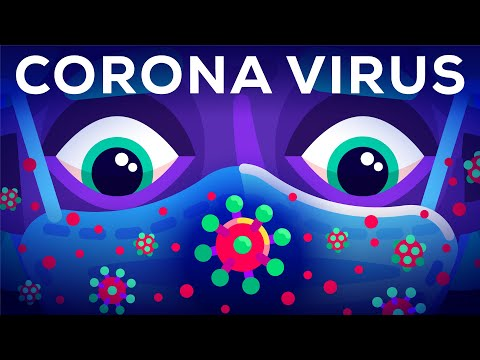

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('BtN-goy9VOY', width=500, height=300)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import gif

## **Data**

The Data consist of records of daily confirmed, recovered and death cases from every country and is updated on daily basis. The data repositary is maintained by **Johns Hopkins CSSE** and is available on [GitHub](https://github.com/CSSEGISandData/COVID-19)

In [3]:
confirmed = pd.read_csv('/home/nabeelhasan/Git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.rename(columns= {"Country/Region" : "Country",
                           "Province/State" : "Province"}, inplace = True)
confirmed.iloc[:, 4:] = confirmed.iloc[:, 4:].fillna(0.0).astype(int)
death = pd.read_csv('/home/nabeelhasan/Git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
death.rename(columns= {"Country/Region" : "Country",
                           "Province/State" : "Province"}, inplace = True)
death.iloc[:, 4:] = death.iloc[:, 4:].fillna(0.0).astype(int)
recovered = pd.read_csv('/home/nabeelhasan/Git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered.rename(columns= {"Country/Region" : "Country",
                           "Province/State" : "Province"}, inplace = True)
recovered.iloc[:, 4:] = recovered.iloc[:, 4:].fillna(0.0).astype(int)

## **Worldwide Cases of Spread**

In [4]:
covid_19_cases = pd.DataFrame({'Confirmed' :confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().T.sum(axis = 1),
                               'Death' : death.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().T.sum(axis = 1),
                               'Recovered' :recovered.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().T.sum(axis = 1)})
covid_19_cases.index = pd.to_datetime(covid_19_cases.index).date

In [5]:
covid_19_cases.tail().iloc[::-1].style.background_gradient(cmap='RdPu')

,Confirmed,Death,Recovered
2020-05-01,3343777,238650,1053327
2020-04-30,3256853,233388,1014775
2020-04-29,3172287,227696,949315
2020-04-28,3097190,220830,907832
2020-04-27,3023722,214515,874457


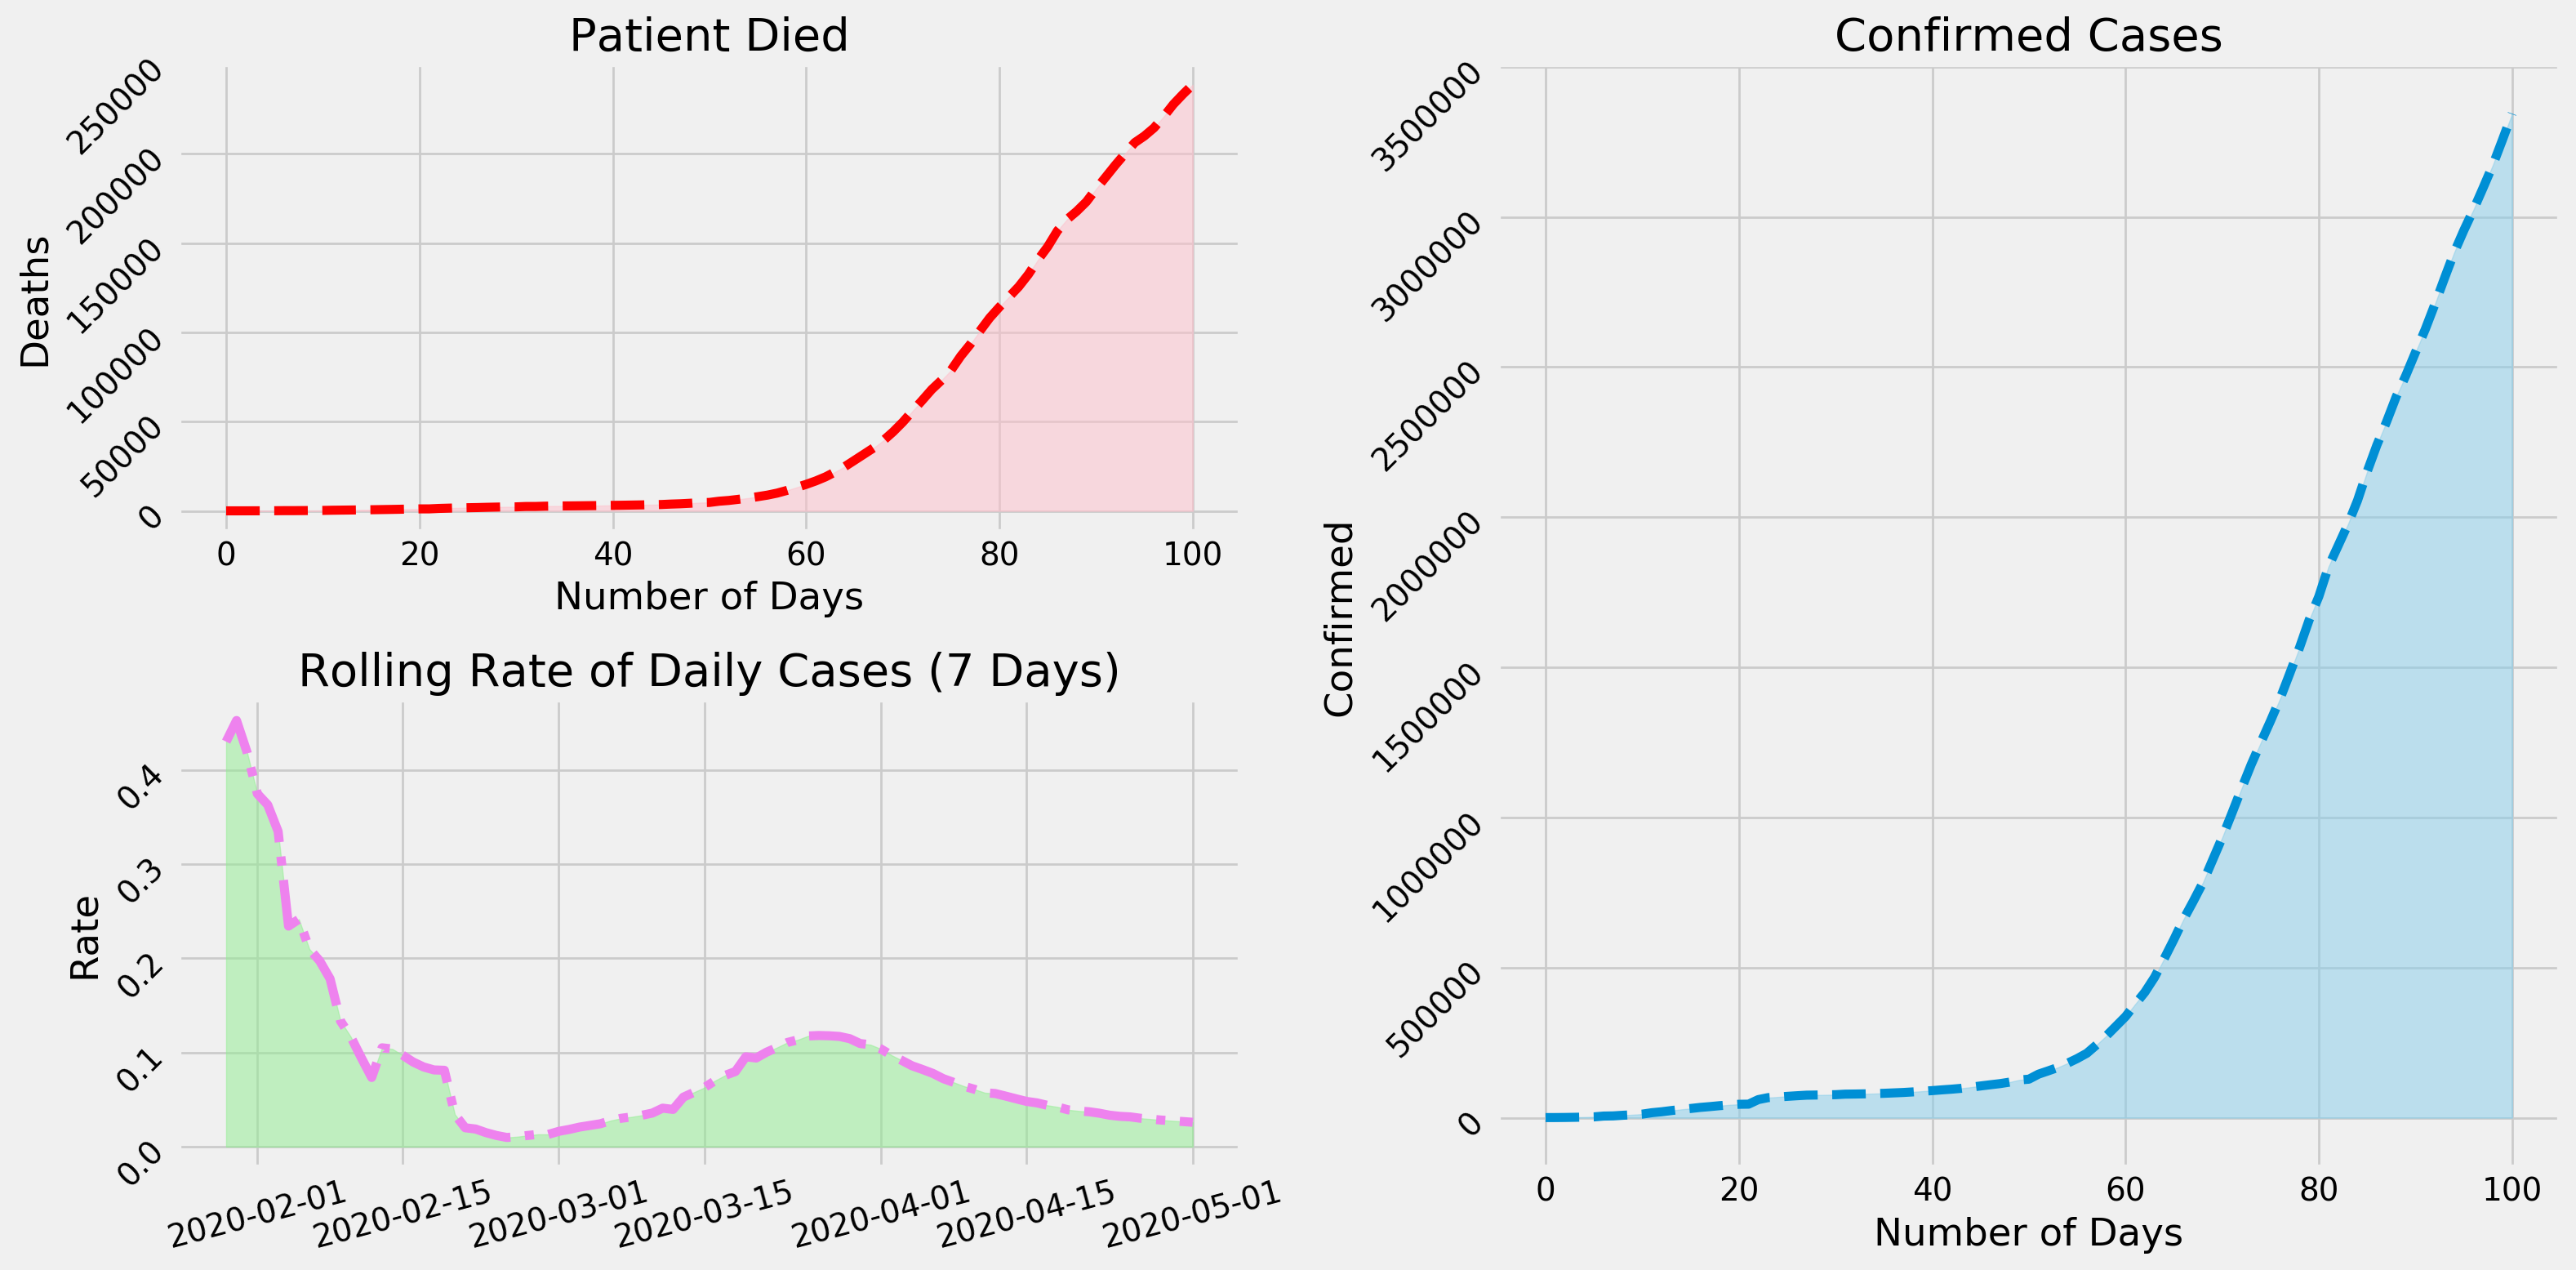

In [6]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize  = (16,8), dpi = 200)
    ax1 = plt.subplot2grid(shape = (2,2), loc = (0,1), rowspan = 2, colspan = 1)
    ax1.plot( range(len(covid_19_cases.index)),covid_19_cases['Confirmed'],   linestyle = 'dashed', label = 'Confirmed' )
    ax1.fill_between( range(len(covid_19_cases.index)),covid_19_cases['Confirmed'], color="skyblue", alpha=0.5)
    ax1.tick_params(axis = 'y', labelrotation=45)
    ax1.set_title('Confirmed Cases')
    ax1.set_xlabel('Number of Days')
    ax1.set_ylabel('Confirmed')
    ax2 = plt.subplot2grid(shape = (2,2), loc = (0,0), rowspan = 1, colspan = 1)
    ax2.plot( range(len(covid_19_cases.index)) ,covid_19_cases['Death'], c = 'red', linestyle = 'dashed')
    ax2.fill_between( range(len(covid_19_cases.index)),covid_19_cases['Death'], color="pink", alpha=0.5)
    ax2.tick_params(axis = 'y',labelrotation=45)
    ax2.set_title('Patient Died')
    ax2.set_xlabel('Number of Days')
    ax2.set_ylabel('Deaths')
    ax3 = plt.subplot2grid(shape = (2,2), loc = (1,0), rowspan = 1,  colspan = 1)
    ax3.plot( covid_19_cases['Confirmed'].pct_change().replace(np.inf, np.nan).dropna().rolling(7).mean(), 
            c = 'violet' ,linestyle = '-.')
    ax3.fill_between( covid_19_cases['Confirmed'].pct_change().replace(np.inf, np.nan).dropna().rolling(7).mean().index,
                     covid_19_cases['Confirmed'].pct_change().replace(np.inf, np.nan).dropna().rolling(7).mean(),
                      color="lightgreen", alpha=0.5)
    ax3.tick_params(axis = 'y',labelrotation=45)
    ax3.tick_params(axis = 'x',labelrotation=15)
    ax3.set_title('Rolling Rate of Daily Cases (7 Days)')
    ax3.set_ylabel('Rate')
    plt.tight_layout()

In [7]:
days = []
n = int(covid_19_cases['Confirmed'][-1]/100000) + 1
for i in np.arange (0,n):
    j = 0
    for index in covid_19_cases['Confirmed'].index :
        if covid_19_cases['Confirmed'][index] < i*100000:
            j = j + 1
        else:
            break
    days.append(j)
print('DOTA: Date Of Target Achieved')
print('NOHTC: Next One Hundred Thousand Cases')
print('NODTAT: Number Of Days To Achieve Target')
print('DTANOHT : Days To Achieve Next One Hundred Thousand')
every_10 = pd.DataFrame({'DOTA': covid_19_cases.index[days],
                         'NOHTC': np.arange(0,n)*100000,
                         'NODTAT': days})
every_10['DTANOHT'] = every_10['NODTAT'].diff().replace(np.nan, 0).astype(int)
every_10

DOTA: Date Of Target Achieved
NOHTC: Next One Hundred Thousand Cases
NODTAT: Number Of Days To Achieve Target
DTANOHT : Days To Achieve Next One Hundred Thousand


,DOTA,NOHTC,NODTAT,DTANOHT
0,2020-01-22,0,0,0
1,2020-03-06,100000,44,44
2,2020-03-18,200000,56,12
3,2020-03-21,300000,59,3
4,2020-03-24,400000,62,3
5,2020-03-26,500000,64,2
6,2020-03-28,600000,66,2
7,2020-03-29,700000,67,1
8,2020-03-31,800000,69,2
9,2020-04-01,900000,70,1


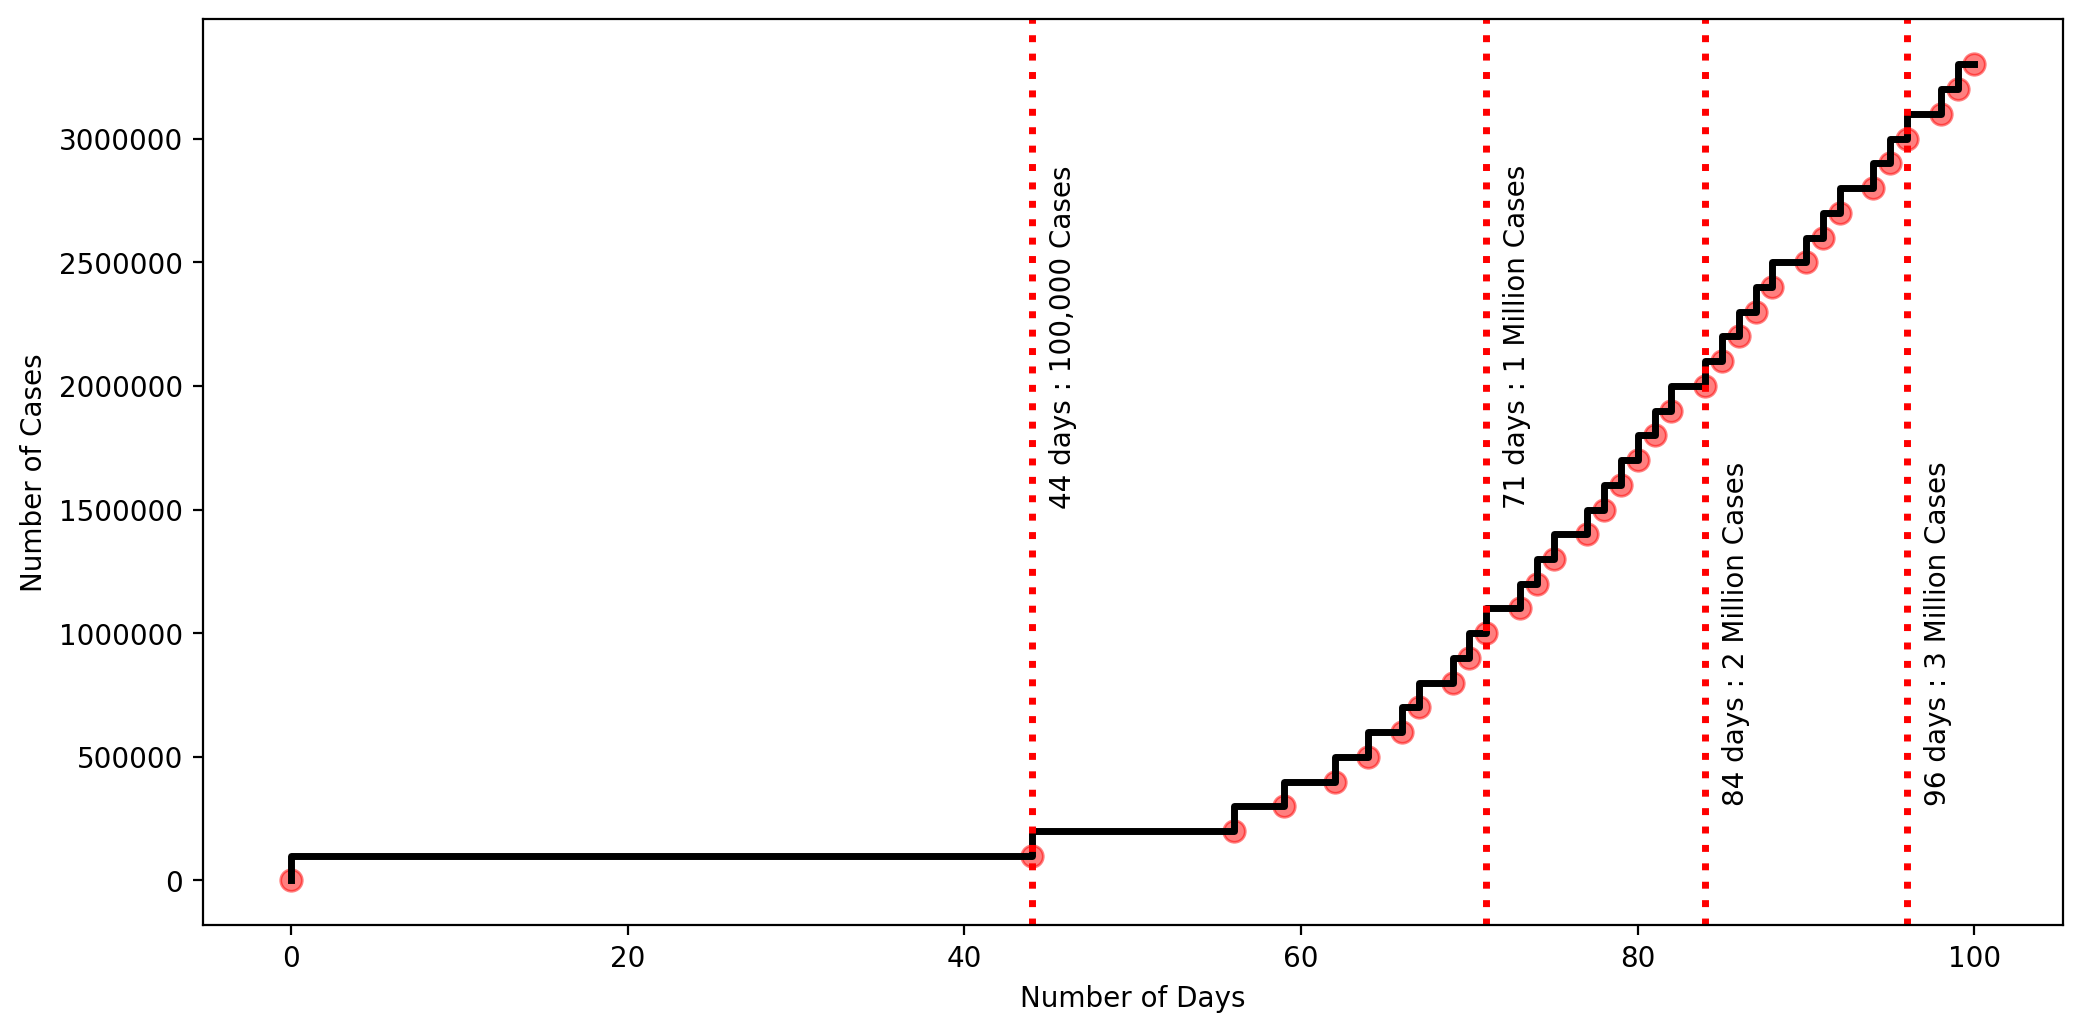

In [25]:
plt.figure(figsize = (12,6), dpi = 200)
plt.step(every_10['NODTAT'], every_10['NOHTC'], color = 'black', linestyle = '-', linewidth = 2.5)
plt.scatter(every_10['NODTAT'], every_10['NOHTC'], color = 'red', marker = 'o', s = 60, alpha = 0.5)
plt.axvline(x = every_10['NODTAT'][1],  color = 'red', linestyle = ':', linewidth = 2.5)
plt.text(45, 2200000, "44 days : 100,000 Cases", rotation=90, verticalalignment='center')
plt.axvline(x = every_10['NODTAT'][10], color = 'red', linestyle = ':', linewidth = 2.5)
plt.text(72, 2200000, "71 days : 1 Million Cases", rotation=90, verticalalignment='center')
plt.axvline(x = every_10['NODTAT'][20], color = 'red', linestyle = ':', linewidth = 2.5)
plt.text(85, 1000000, "84 days : 2 Million Cases", rotation=90, verticalalignment='center')
plt.axvline(x = every_10['NODTAT'][30], color = 'red', linestyle = ':', linewidth = 2.5)
plt.text(97, 1000000, "96 days : 3 Million Cases", rotation=90, verticalalignment='center')
plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.savefig('Animated_Objects/dailyMilestone')

From the data we can see that the number of confirmed cases rose exponentially over the span of sixty days , The number of recovered patients seems to be stable and rising but the number of deaths are skyrocketing for last ten days as this pandemic spread in Western Hemisphere. This shows us how rapidly corona virus spread. Below there is an animation to give the idea of extent of spread in different countries and which countries are hardest hit by Covid19.  

![Alt Text](Animated_Objects/worldwide.gif)

## **Major countries with most number of Covid19 cases**

/home/nabeelhasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


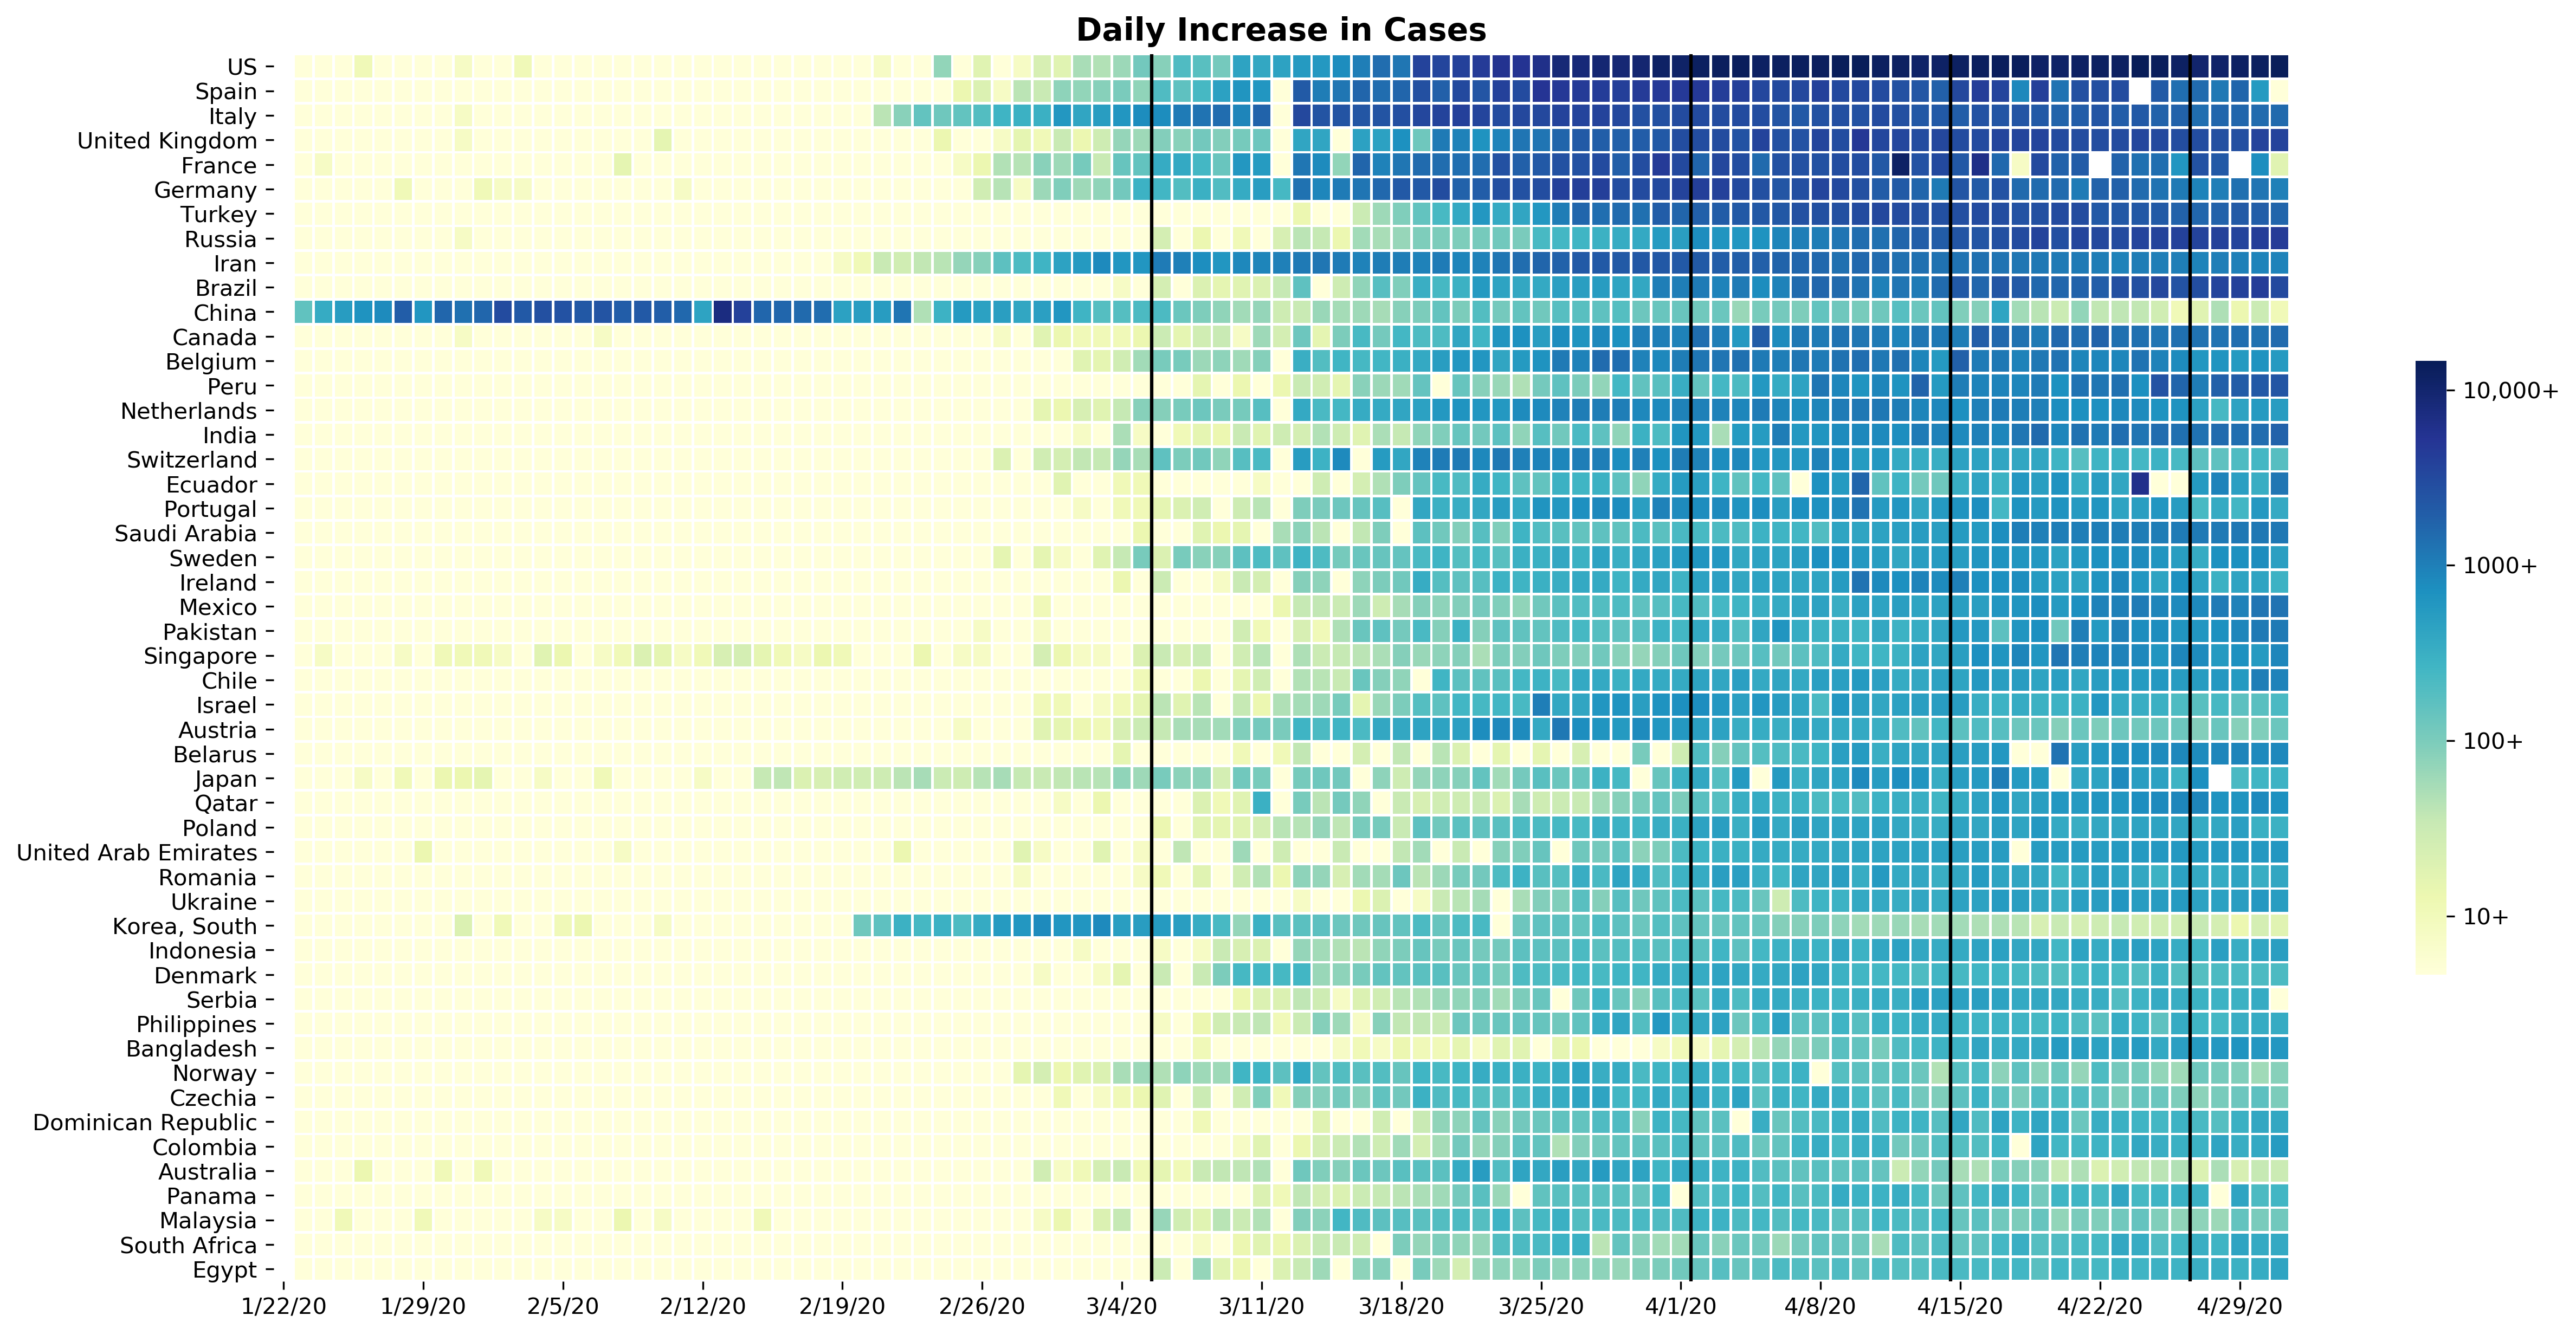

In [33]:
top50 = confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().iloc[:, -1].sort_values(ascending=False)[0:50]
heatmap = confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().diff(axis = 1).loc[top50.index, :].replace(0,1)
heatmap = np.log(heatmap)   #.replace(-np.inf, 0).iloc[:, 1:]
plt.figure(figsize = (20, 10), dpi = 300)
cbar_kws = {"shrink":0.5,
            #'extend':'min',
            #'extend':'max',
            'extendfrac':0.1, 
            "drawedges":False, 
            'ticks': [1, 4, 7, 10],
            'label':''}
ax = sns.heatmap(heatmap, linewidth = 0.9, cbar = True, cmap = 'YlGnBu',xticklabels=7,cbar_kws= cbar_kws)
ax.vlines([44, 71, 84, 96], *ax.get_ylim(), color = 'black')  # 44 days
cbar = ax.collections[0].colorbar
cbar.set_ticklabels(['10+', '100+', '1000+', '10,000+'])
plt.xlabel('');
plt.ylabel('')
plt.title('Daily Increase in Cases', fontsize=14, fontweight='bold')
plt.savefig('Animated_Objects/Heatmap.png');

In [10]:
major = confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().iloc[:, -1].sort_values(ascending=False)[0:21]
major = major.to_frame()
major.rename(columns = {major.columns[0]: 'Confirmed'}, inplace = True)
major['Death'] = death.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().loc[(major.index), death.columns[-1]]
major['Recoverd'] = recovered.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().loc[(major.index), recovered.columns[-1]]
major.style.background_gradient(cmap='RdPu')

,Confirmed,Death,Recoverd
Country,,,
US,1103461,64943,164015
Spain,213435,24543,112050
Italy,207428,28236,78249
United Kingdom,178685,27583,892
France,167305,24628,51124
Germany,164077,6736,126900
Turkey,122392,3258,53808
Russia,114431,1169,13220
Iran,95646,6091,76318


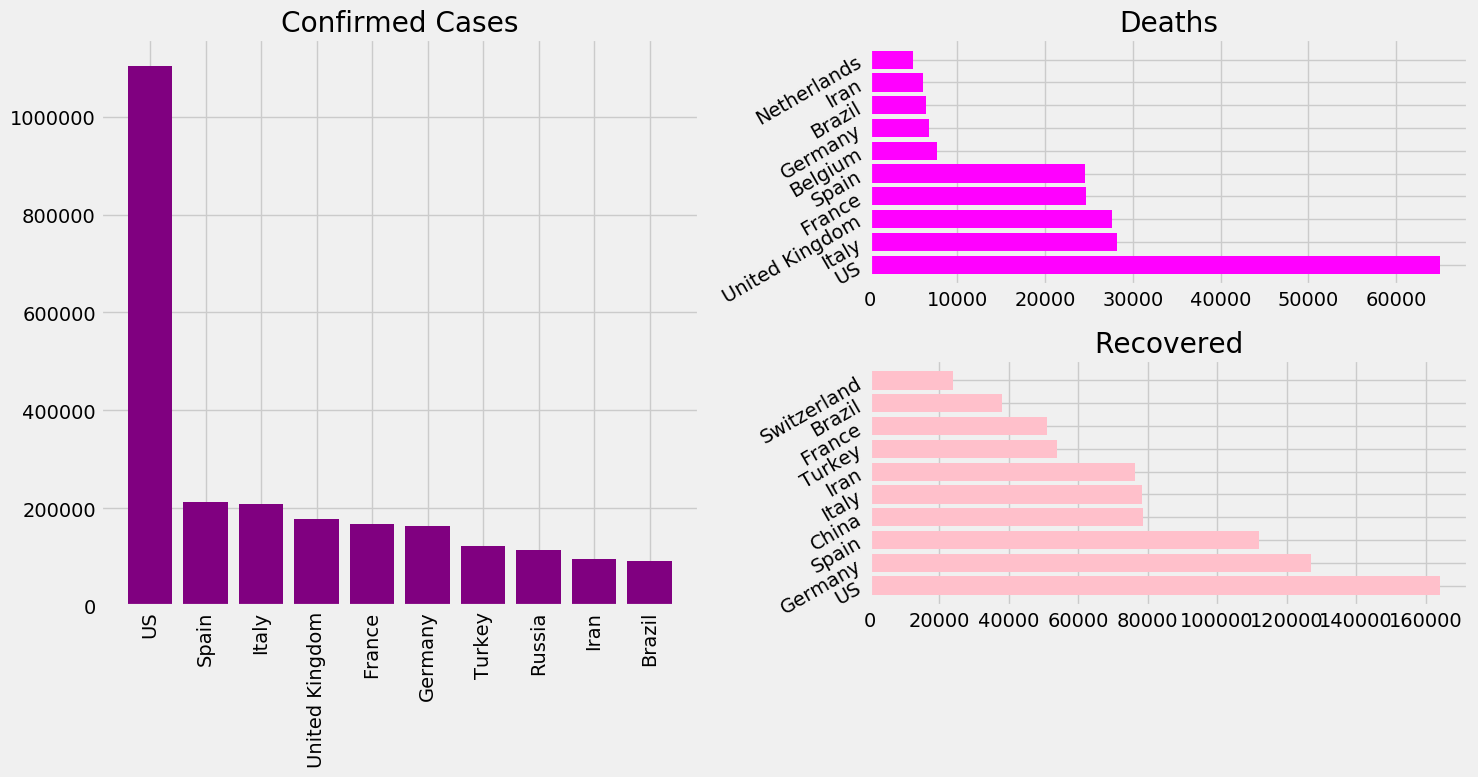

In [11]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize = (15, 8), dpi = 100)
    ax1 = plt.subplot2grid(shape = (2,2), loc= (0,0), rowspan = 2, colspan = 1)
    ax1.bar(major['Confirmed'].sort_values(ascending=False).index[0:10], major['Confirmed'].sort_values(ascending=False)[0:10], color = 'purple' )
    ax1.tick_params(axis = 'x', labelrotation=90)
    ax1.set_title('Confirmed Cases')
    ax2 = plt.subplot2grid(shape = (2,2), loc = (0,1), rowspan = 1, colspan = 1)
    ax2.barh( major['Death'].sort_values(ascending=False).index[0:10], major['Death'].sort_values(ascending=False)[0:10], color = 'fuchsia')
    ax2.tick_params(axis = 'y', labelrotation=30)
    ax2.set_title('Deaths')
    ax3 = plt.subplot2grid(shape = (2,2), loc = (1,1), rowspan = 1, colspan = 1)
    ax3.barh(major['Recoverd'].sort_values(ascending=False).index[0:10], major['Recoverd'].sort_values(ascending=False)[0:10], color = 'pink')
    ax3.tick_params(axis = 'y', labelrotation=30)
    ax3.set_title('Recovered')
    plt.tight_layout()


## **Trajectory Of Spread in major countries**

Cases have stablised in **China** and **South Korea** 

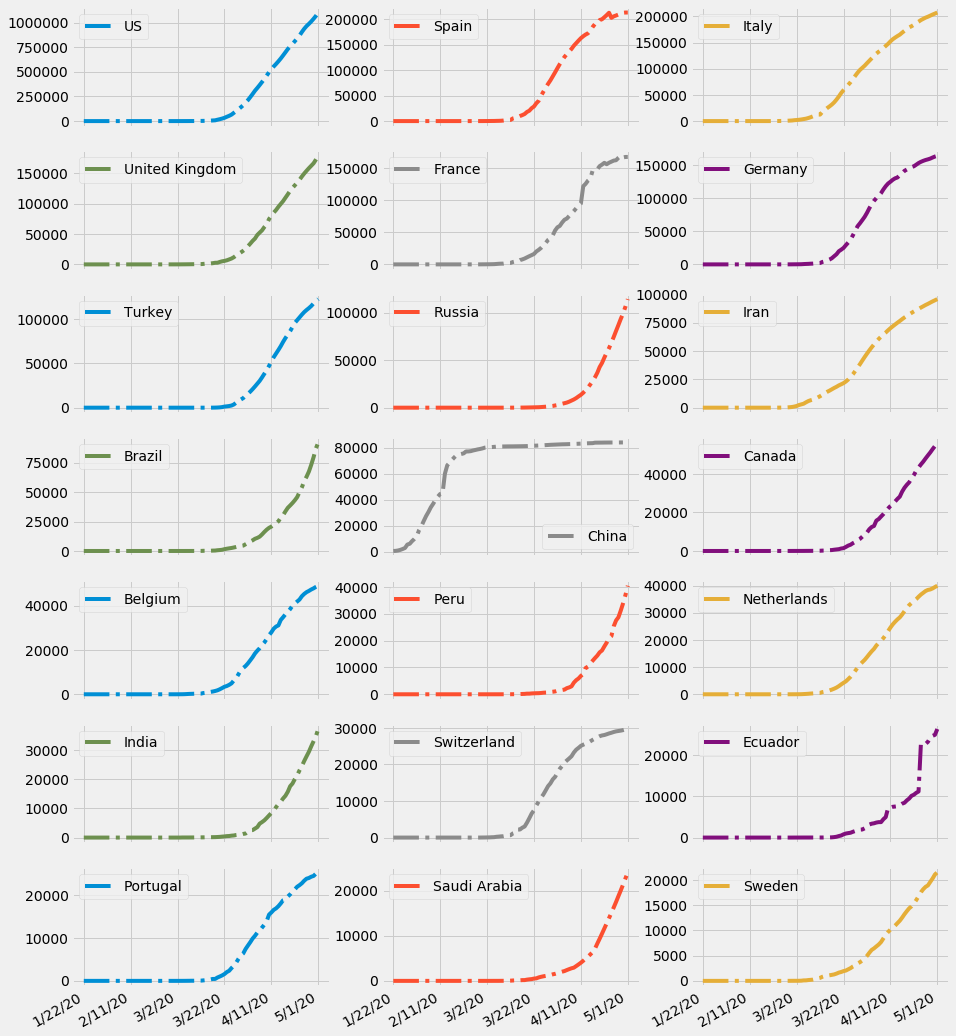

In [12]:
df_09 = confirmed.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().loc[major.index].T
with plt.style.context('fivethirtyeight'):
    df_09.plot(subplots = True, layout = (7,3), linestyle = 'dashdot', figsize = (14,20));

## **Momentum of spread (based on rolling mean)**

**This figure shows the number of cases grow based on five day rolling mean** This give us the current strenght of spread. 
1. We can see cases in China and Korea have very low momentum now
2. Italyand Iran momentum is growing weak and now under 10 percent
3. European countries except of Italy have still high spread rate specially in Spain 
4. United States currently have very high momentum of spread as test show new cases every day 

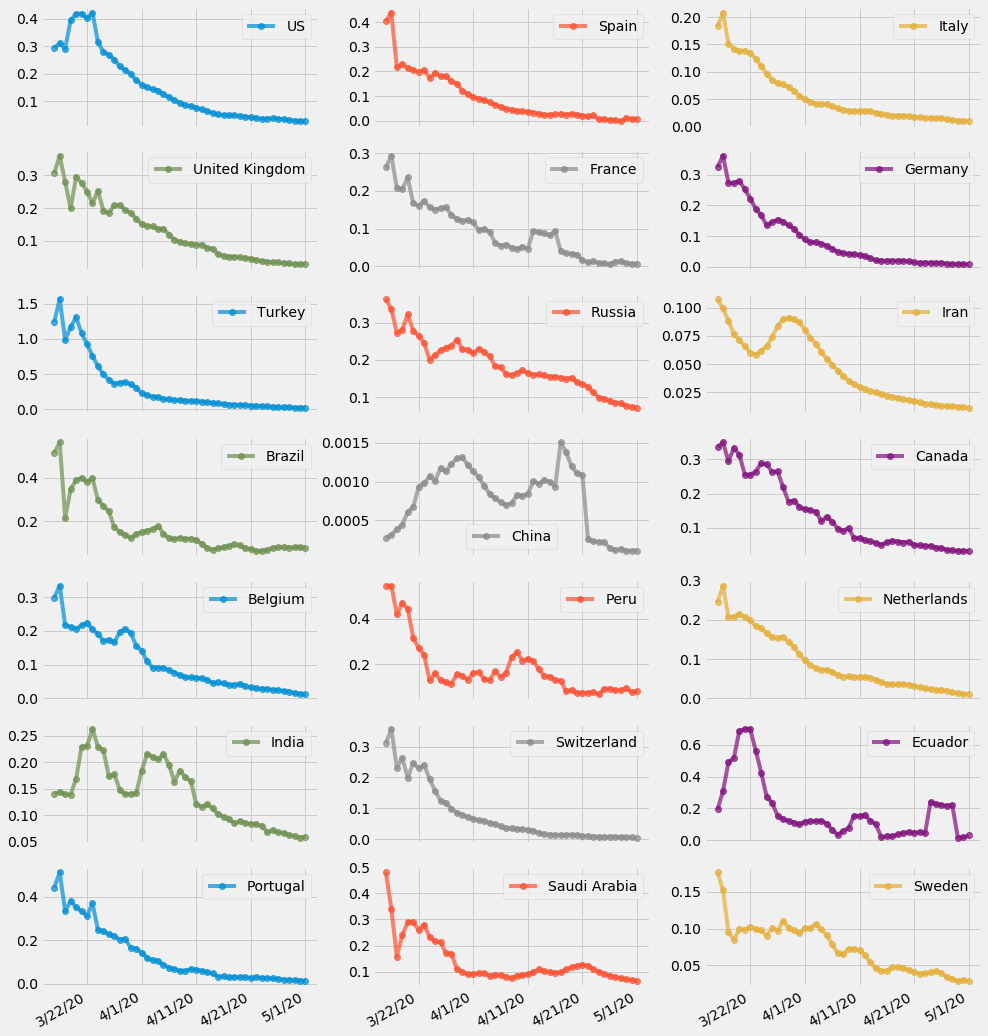

In [13]:
with plt.style.context('fivethirtyeight'):
    df_09.pct_change().replace(np.inf, np.nan).dropna().rolling(5).mean().plot(subplots = True,
                                                                               layout = (7,3), marker = 'o', alpha = 0.7, figsize = (15,20));

## **Rate of Mortality (based on rolling mean)**

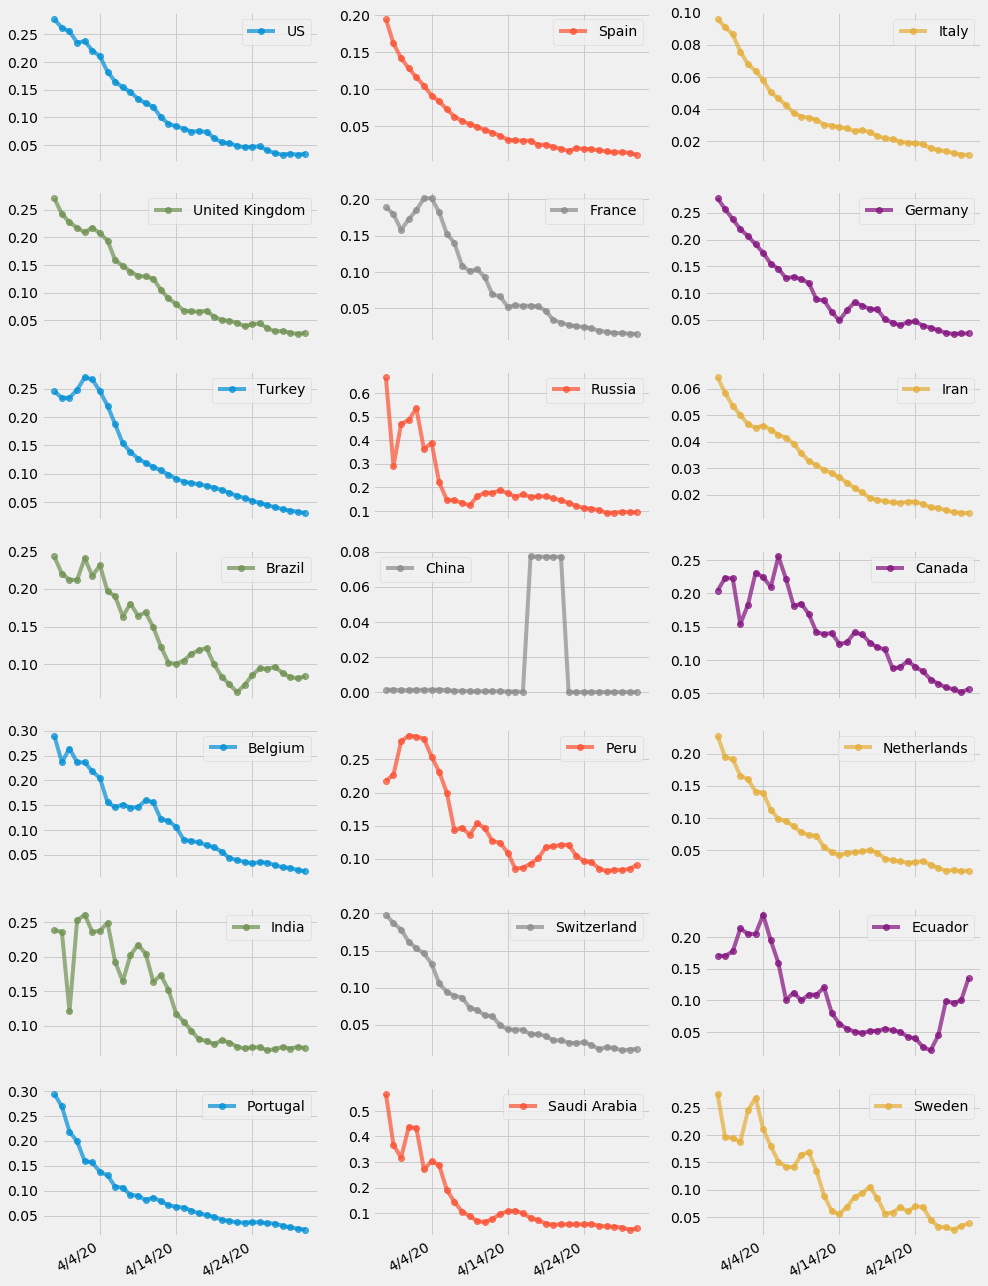

In [14]:
death_df_09 = death.drop(columns = ['Province', 'Lat', 'Long']).groupby('Country').sum().loc[major.index].T
with plt.style.context('fivethirtyeight'):
    death_df_09.pct_change().replace(np.inf, np.nan).dropna().rolling(5).mean().plot(subplots = True,
                                                                               layout = (7,3), marker = 'o',alpha = 0.7, figsize = (15,25));


## **A Model for Spread of Covid19**

This is a great explaination by **Grant Sanderson** from [3blue1brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw). He is certainly a math genius and have an amazing capability of visualizing mathematical concepts

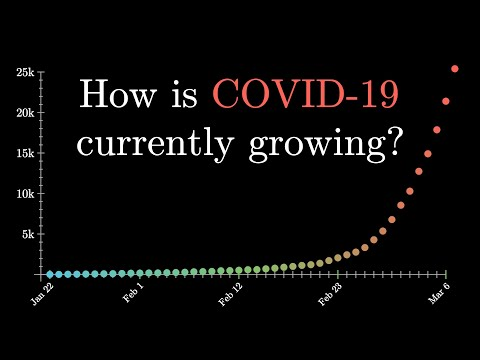

In [15]:
YouTubeVideo('Kas0tIxDvrg', width=500, height=300)

## **Analysis of Covid19 cases in China**

In [16]:
China = confirmed[confirmed['Country'] == 'China']
China = China.set_index('Province')

In [17]:
@gif.frame
def plot(a):
    fig = plt.gcf()
    fig.set_size_inches(15, 12)
    m = Basemap(projection='mill', 
            llcrnrlat=15, urcrnrlat=55, 
            llcrnrlon=70, urcrnrlon=135, 
            lat_ts=20, 
            resolution='l')
    m.drawcoastlines(color='black', linewidth=0.5)
    m.drawcountries(color='black', linewidth=0.5)
    x, y = m(np.array(China['Long']), np.array(China['Lat']))
    plt.scatter( x,  y,s = (China[f'{a}'])*0.10, c = China[f'{a}'], cmap = 'rainbow', alpha = 0.7, edgecolor = 'grey',linewidth = 1.6)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('China \n Spread on {}'.format(a), fontsize=14, fontweight='bold')
    
frames = []
for i in confirmed.columns[4:]: 
    frame = plot(i)
    frames.append(frame)

gif.save(frames, "Animated_Objects/china.gif", duration = 250)

![Alt Text](Animated_Objects/china.gif)

### **Provincial Data from China**

As **Grant Sanderson** explained in his video once virus started to reach the true population we will observe a Logistic curve. Right now the Chinese government effort of complete lockdown have helped this effort to reach this level very quickly. But this should be taken with sound of caution as China reopens it cities this might spread again. So containment efforts should remain in place as long as we don't see any rapid imporovements in the situation  

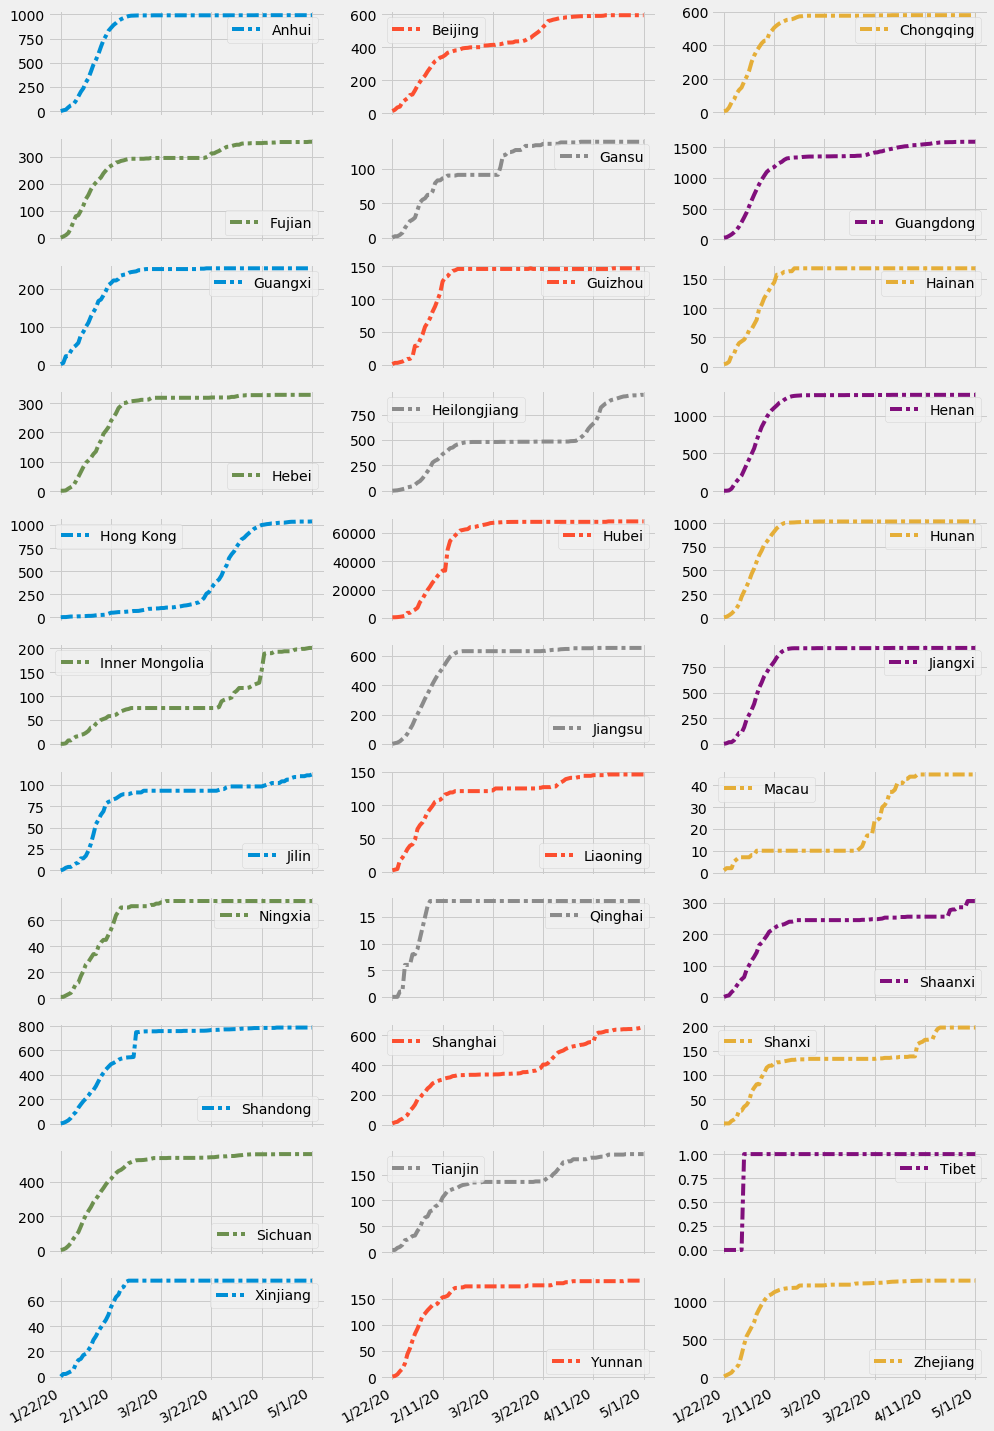

In [18]:
with plt.style.context('fivethirtyeight'):
    China.drop(columns = ['Country', 'Lat', 'Long']).T.plot(subplots = True, layout = (11,3), linestyle = (0, (3,1,1,1)), figsize = (15,28));
